In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [6]:
train = pd.read_csv('Kaggle/bike-sharing-demand/train.csv', parse_dates=['datetime'])
test = pd.read_csv('Kaggle/bike-sharing-demand/test.csv', parse_dates=['datetime'])

In [7]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second
train['dayofweek'] = train.datetime.dt.dayofweek

In [8]:
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['minute'] = test.datetime.dt.minute
test['second'] = test.datetime.dt.second
test['dayofweek'] = test.datetime.dt.dayofweek

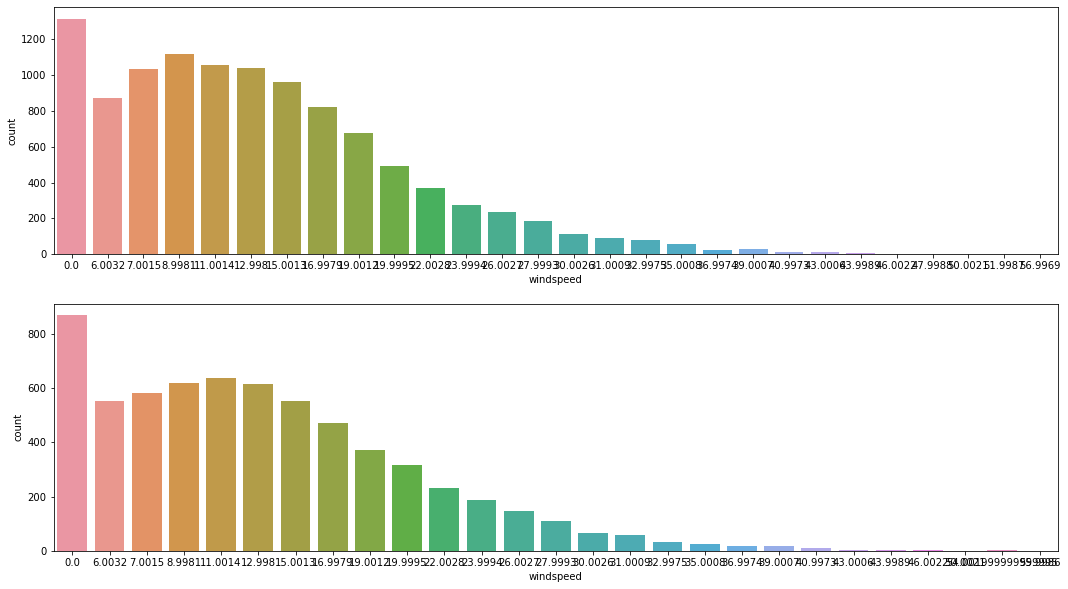

In [14]:
fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(18, 10)
sns.countplot(data= train, x = 'windspeed', ax =axes[0])


fig.set_size_inches(18, 10)
sns.countplot(data= test, x = 'windspeed', ax =axes[1])

In [15]:
trainwind0 = train[train.windspeed == 0]
trainwindnot0 = train[train.windspeed != 0]


In [18]:
trainwind0.shape

(1313, 19)

In [19]:
# 랜덤포레스트 기반 풍속 예측

In [20]:
def predictWindSpeed(data):
    datawind0 = data.loc[data['windspeed'] == 0]
    datawindnot0 = data.loc[data['windspeed'] != 0]
    wCol = ['season', 'weather', 'humidity', 'month', 'temp']
    datawindnot0['windspeed'] = datawindnot0.windspeed.astype('str')
    rfModelwind = RandomForestRegressor()
    rfModelwind.fit(datawindnot0[wCol, datawindnot0.windspeed])
    rfModelwind.predict(X = datawind0)
    return data


In [ ]:
predictWindSpeed(train)